In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

First, we read our raw data.

In [9]:
data = pd.read_csv(r'BakuApartmentData.csv')
data

,Unnamed: 0,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
0,0,284000,Azadlıq Prospekti m.,3,140.0,12-May,1,1,1,1
1,1,355000,Şah İsmayıl Xətai m.,3,135.0,19/20,1,1,1,1
2,2,755000,Səbail r.,4,210.0,18-Jul,1,1,1,1
3,3,245000,Elmlər Akademiyası m.,3,86.0,10-Aug,1,1,1,1
4,4,350000,Elmlər Akademiyası m.,4,174.0,15-Dec,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
39297,39297,85500,9-cu mikrorayon q.,2,45.0,9-Sep,0,0,1,0
39298,39298,102500,Memar Əcəmi m.,2,48.0,5-Mar,0,0,1,0
39299,39299,143500,İnşaatçılar m.,3,65.0,5-Mar,0,0,1,0
39300,39300,172000,Elmlər Akademiyası m.,4,90.0,5-Mar,0,0,1,0


Now, we look at its describtion to start our preprocessing.

In [11]:
data.describe(include="all")

,Unnamed: 0,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
count,39302.000000,3.930200e+04,39302,39302.000000,39302.000000,39302,39302.000000,39302.000000,39302.000000,39302.000000
unique,NaN,NaN,111,NaN,NaN,370,NaN,NaN,NaN,NaN
top,NaN,NaN,İnşaatçılar m.,NaN,NaN,5-May,NaN,NaN,NaN,NaN
freq,NaN,NaN,2834,NaN,NaN,1143,NaN,NaN,NaN,NaN
mean,19650.500000,2.322323e+05,NaN,2.813648,106.039311,NaN,0.755890,0.839016,0.768256,0.337947
std,11345.654476,1.827754e+05,NaN,0.914880,59.856534,NaN,0.429564,0.367521,0.421952,0.473016
min,0.000000,9.600000e+03,NaN,1.000000,12.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,9825.250000,1.350000e+05,NaN,2.000000,65.000000,NaN,1.000000,1.000000,1.000000,0.000000
50%,19650.500000,1.870000e+05,NaN,3.000000,94.000000,NaN,1.000000,1.000000,1.000000,0.000000
75%,29475.750000,2.770000e+05,NaN,3.000000,130.000000,NaN,1.000000,1.000000,1.000000,1.000000


Here, we have useless column ["Unnamed: 0"]

In [13]:
data = data.drop(["Unnamed: 0"], axis=1)
data

,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
0,284000,Azadlıq Prospekti m.,3,140.0,12-May,1,1,1,1
1,355000,Şah İsmayıl Xətai m.,3,135.0,19/20,1,1,1,1
2,755000,Səbail r.,4,210.0,18-Jul,1,1,1,1
3,245000,Elmlər Akademiyası m.,3,86.0,10-Aug,1,1,1,1
4,350000,Elmlər Akademiyası m.,4,174.0,15-Dec,1,1,1,1
...,...,...,...,...,...,...,...,...,...
39297,85500,9-cu mikrorayon q.,2,45.0,9-Sep,0,0,1,0
39298,102500,Memar Əcəmi m.,2,48.0,5-Mar,0,0,1,0
39299,143500,İnşaatçılar m.,3,65.0,5-Mar,0,0,1,0
39300,172000,Elmlər Akademiyası m.,4,90.0,5-Mar,0,0,1,0


We see that in our "floor" column, we have meaningless dates. So, we need to keep only days as "floor"

In [15]:
data['floor'] = pd.to_datetime(data['floor'], format='%d-%b', errors='coerce')
data['floor'] = data['floor'].dt.day

Let's check if we have NaN values in our dataset.

In [17]:
data.isnull().sum()

price                  0
location               0
rooms                  0
square                 0
floor               8439
new_building           0
has_repair             0
has_bill_of_sale       0
has_mortgage           0
dtype: int64

We can either delete those rows or just fill with mean.

In [19]:
data["floor"] = data["floor"].fillna(data["floor"].mean())

In [20]:
data.isnull().sum()

price               0
location            0
rooms               0
square              0
floor               0
new_building        0
has_repair          0
has_bill_of_sale    0
has_mortgage        0
dtype: int64

So we have no NaN values in our dataset.

We can observe that we have float values in our "floor" column

In [23]:
data["floor"] = data["floor"].astype(int)

In [24]:
data

,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
0,284000,Azadlıq Prospekti m.,3,140.0,12,1,1,1,1
1,355000,Şah İsmayıl Xətai m.,3,135.0,12,1,1,1,1
2,755000,Səbail r.,4,210.0,18,1,1,1,1
3,245000,Elmlər Akademiyası m.,3,86.0,10,1,1,1,1
4,350000,Elmlər Akademiyası m.,4,174.0,15,1,1,1,1
...,...,...,...,...,...,...,...,...,...
39297,85500,9-cu mikrorayon q.,2,45.0,9,0,0,1,0
39298,102500,Memar Əcəmi m.,2,48.0,5,0,0,1,0
39299,143500,İnşaatçılar m.,3,65.0,5,0,0,1,0
39300,172000,Elmlər Akademiyası m.,4,90.0,5,0,0,1,0


In "location" columns, we see that some of them is finishing with "m." with means METRO.
Some of them finishing with "r." and "q." which means RAYON(REGION) and QƏSƏBƏ(SETTLEMENT).
So we create a new columns "has_metro" to determine whether there is a metro or not.

In [26]:
data['has_metro'] = np.where(data['location'].str[-2] == 'm', 1, 0)


In [27]:
data

,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage,has_metro
0,284000,Azadlıq Prospekti m.,3,140.0,12,1,1,1,1,1
1,355000,Şah İsmayıl Xətai m.,3,135.0,12,1,1,1,1,1
2,755000,Səbail r.,4,210.0,18,1,1,1,1,0
3,245000,Elmlər Akademiyası m.,3,86.0,10,1,1,1,1,1
4,350000,Elmlər Akademiyası m.,4,174.0,15,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
39297,85500,9-cu mikrorayon q.,2,45.0,9,0,0,1,0,0
39298,102500,Memar Əcəmi m.,2,48.0,5,0,0,1,0,1
39299,143500,İnşaatçılar m.,3,65.0,5,0,0,1,0,1
39300,172000,Elmlər Akademiyası m.,4,90.0,5,0,0,1,0,1


Now, we will divide 111 unique locations into 13:
Binəqədi, Qaradağ, Xətai, Xəzər, Nərimanov, Nəsimi, Nizami, Səbail, Sabunçu, Suraxanı, Yasamal, Abşeron.

In [29]:
regions = pd.read_excel(r'regions.xlsx')

In [30]:
binagadi = regions["Binəqədi"].tolist()
qaradag = regions["Qaradağ"].tolist()[:4]
xetai = regions["Xətai"].tolist()[:11]
xezer = regions["Xəzər"].tolist()[:6]
narimanov = regions["Nərimanov"].tolist()[:6]
nasimi = regions["Nəsimi"].tolist()[:8]
nizami = regions["Nizami"].tolist()[:6]
sabail = regions["Səbail"].tolist()[:7]
sabuncu = regions["Sabunçu"].tolist()[:12]
suraxani = regions["Suraxanı"].tolist()[:14]
yasamal = regions["Yasamal"].tolist()[:6]
abseron = regions["Abşeron"].tolist()[:12]

In [31]:
for i,j in [
    (binagadi, "Binəqədi"),
    (qaradag, "Qaradağ"),
    (xetai, "Xətai"),
    (xezer, "Xəzər"),
    (narimanov, "Nərimanov"),
    (nasimi, "Nəsimi"),
    (nizami, "Nizami"),
    (sabail, "Səbail"),
    (sabuncu, "Sabunçu"),
    (suraxani, "Suraxanı"),
    (yasamal, "Yasamal"),
    (abseron, "Abşeron"),
]:
    data["location"] = data["location"].replace(i,j)

In [32]:
data

,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage,has_metro
0,284000,Binəqədi,3,140.0,12,1,1,1,1,1
1,355000,Xətai,3,135.0,12,1,1,1,1,1
2,755000,Səbail,4,210.0,18,1,1,1,1,0
3,245000,Yasamal,3,86.0,10,1,1,1,1,1
4,350000,Yasamal,4,174.0,15,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
39297,85500,Binəqədi,2,45.0,9,0,0,1,0,0
39298,102500,Nəsimi,2,48.0,5,0,0,1,0,1
39299,143500,Yasamal,3,65.0,5,0,0,1,0,1
39300,172000,Yasamal,4,90.0,5,0,0,1,0,1


In [33]:
data_num = data.drop(["location"], axis=1)

It is time to measure CORRELATION between columns

In [35]:
data_num.corr()["price"]

price               1.000000
rooms               0.598693
square              0.808165
floor               0.214975
new_building        0.259140
has_repair         -0.117642
has_bill_of_sale    0.014385
has_mortgage       -0.004653
has_metro           0.067008
Name: price, dtype: float64

In [36]:
data = data.drop("has_bill_of_sale has_mortgage".split(), axis=1)

In [37]:
data_num = data_num.drop("has_bill_of_sale has_mortgage".split(), axis=1)

In [38]:
data_num.columns

Index(['price', 'rooms', 'square', 'floor', 'new_building', 'has_repair',
       'has_metro'],
      dtype='object')

Now, let's check the dependence between independent columns with VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[[
    # 'rooms',
    'square',
    # 'floor',
    'new_building',
    'has_repair',
    'has_metro'
]]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.975757,square
1,3.909150,new_building
2,3.256982,has_repair
3,2.828574,has_metro


In [41]:
data = data.drop("rooms floor".split(), axis=1)
data_num = data_num.drop("rooms floor".split(), axis=1)

In [42]:
data

,price,location,square,new_building,has_repair,has_metro
0,284000,Binəqədi,140.0,1,1,1
1,355000,Xətai,135.0,1,1,1
2,755000,Səbail,210.0,1,1,0
3,245000,Yasamal,86.0,1,1,1
4,350000,Yasamal,174.0,1,1,1
...,...,...,...,...,...,...
39297,85500,Binəqədi,45.0,0,0,0
39298,102500,Nəsimi,48.0,0,0,1
39299,143500,Yasamal,65.0,0,0,1
39300,172000,Yasamal,90.0,0,0,1


Determining the outliers and capping them to the borders

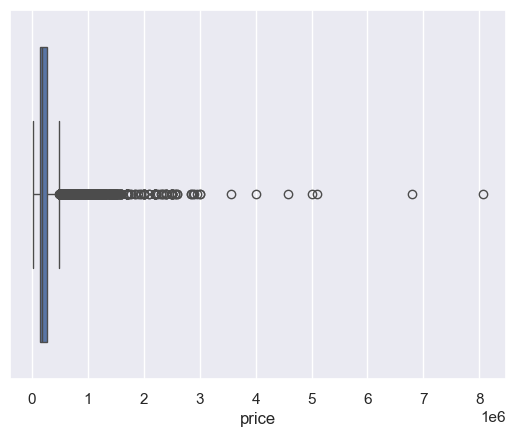

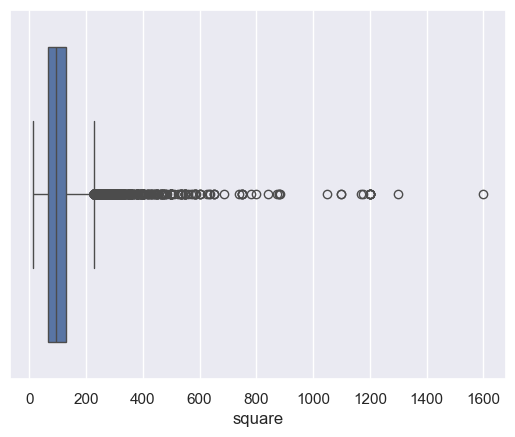

In [44]:
for i in ['price', 'square']:
    sns.boxplot(data=data, x=data[i])
    plt.show()

In [45]:
q1 = data_num.quantile(0.25)
q3 = data_num.quantile(0.75)
IQR = q3-q1
Upper = q3+1.5*IQR
Lower = q1-1.5*IQR

In [46]:
for i in ['price', 'square']:
    data[i] = np.where(data[i]>Upper[i], Upper[i], data[i])

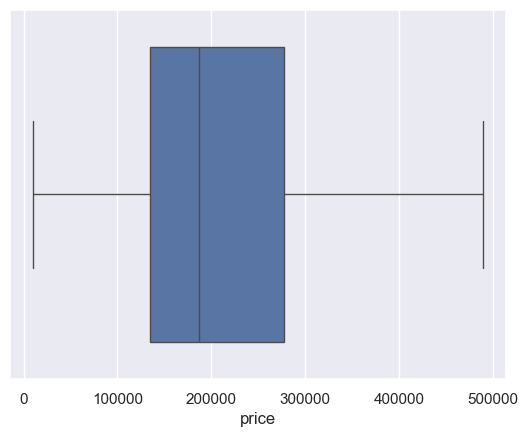

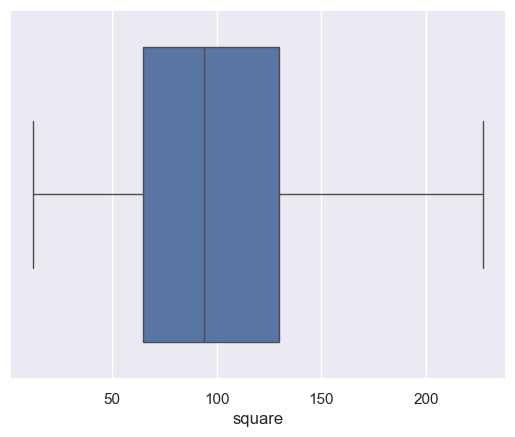

In [47]:
for i in ['price', 'square']:
    sns.boxplot(data=data, x=data[i])
    plt.show()

turning categorical values to 0/1s using get_dummies

In [49]:
data = pd.get_dummies(data, drop_first=True)

In [50]:
data[['location_Binəqədi', 'location_Nizami', 'location_Nərimanov',
       'location_Nəsimi', 'location_Pirallahı r.', 'location_Qaradağ',
       'location_Sabunçu', 'location_Suraxanı', 'location_Səbail',
       'location_Xətai', 'location_Xəzər', 'location_Yasamal']] = data[['location_Binəqədi', 'location_Nizami', 'location_Nərimanov',
       'location_Nəsimi', 'location_Pirallahı r.', 'location_Qaradağ',
       'location_Sabunçu', 'location_Suraxanı', 'location_Səbail',
       'location_Xətai', 'location_Xəzər', 'location_Yasamal']].astype(int)

In [51]:
data

,price,square,new_building,has_repair,has_metro,location_Binəqədi,location_Lökbatan q.,location_Nizami,location_Nərimanov,location_Nəsimi,location_Pirallahı r.,location_Qaradağ,location_Sabunçu,location_Suraxanı,location_Səbail,location_Xətai,location_Xəzər,location_Yasamal
0,284000.0,140.0,1,1,1,1,False,0,0,0,0,0,0,0,0,0,0,0
1,355000.0,135.0,1,1,1,0,False,0,0,0,0,0,0,0,0,1,0,0
2,490000.0,210.0,1,1,0,0,False,0,0,0,0,0,0,0,1,0,0,0
3,245000.0,86.0,1,1,1,0,False,0,0,0,0,0,0,0,0,0,0,1
4,350000.0,174.0,1,1,1,0,False,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39297,85500.0,45.0,0,0,0,1,False,0,0,0,0,0,0,0,0,0,0,0
39298,102500.0,48.0,0,0,1,0,False,0,0,1,0,0,0,0,0,0,0,0
39299,143500.0,65.0,0,0,1,0,False,0,0,0,0,0,0,0,0,0,0,1
39300,172000.0,90.0,0,0,1,0,False,0,0,0,0,0,0,0,0,0,0,1


Assigning dependent and independent values

In [53]:
y = data["price"]
x = data.drop(["price"], axis=1)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=47)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model, x_test, y_test):

    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }

Applying ML Models:
1) LGBM
2) XGBoost
3) CatBoost

* tuning each model

In [57]:
from lightgbm import LGBMRegressor

In [58]:
lgbm_model = LGBMRegressor()
lgbm_model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 27511, number of used features: 15
[LightGBM] [Info] Start training from score 218722.494348


LGBMRegressor()

In [59]:
evaluate(lgbm_model, x_test, y_test)

{'MAE': 31367.193087139054,
 'MSE': 2111221007.110995,
 'RMSE': 45948.02506213945,
 'R-squared': 0.8287485104539344}

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
random_grid_lgbm = {
    "n_estimators": [10,50,100,500,1000],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3,5,7,10],
    "num_leaves": [10,20,30,40,60,70,80,90,100]
}

a = RandomizedSearchCV(
    estimator = lgbm_model,
    param_distributions = random_grid_lgbm,
    n_iter = 40, cv=3, verbose=1,
    random_state=47,n_jobs=-1
)

a.fit(x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 27511, number of used features: 15
[LightGBM] [Info] Start training from score 218722.494348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=40, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'num_leaves': [10, 20, 30, 40, 60, 70,
                                                       80, 90, 100]},
                   random_state=47, verbose=1)

In [62]:
optimized_lgbm_model = a.best_estimator_
evaluate(optimized_lgbm_model, x_test, y_test)

{'MAE': 30034.445048510304,
 'MSE': 2028789959.702176,
 'RMSE': 45042.09097835242,
 'R-squared': 0.8354348969601579}

In [63]:
models = pd.DataFrame()
models["LGBM"] = ["82.89%"]
models["LGBM_opt"] = ["83.55%"]

In [64]:
from xgboost import XGBRegressor

In [65]:
xgb_model = XGBRegressor()
# xgb_model.fit(x_train, y_train)

In [66]:
# evaluate(xgb_model, x_test, y_test)

In [67]:
random_grid_xgb = {
    "n_estimators": [10,50,100,500,1000],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3,5,7,10],
    "subsample": np.linspace(0.5, 1, num=6),
    "colsample_bytree": np.linspace(0.5, 1, num=6),
    "gamma": [0,1,5]
}

b = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = random_grid_xgb,
    n_iter = 40, cv=3, verbose=1,
    random_state=47,n_jobs=-1
)

# b.fit(x_train, y_train)

In [68]:
# optimized_xgb_model = b.best_estimator_
# evaluate(optimized_xgb_model, x_test, y_test)

In [69]:
models["XGB"] = ["82.95%"]
models["XGB_opt"] = ["83.27%"]

In [70]:
models

,LGBM,LGBM_opt,XGB,XGB_opt
0,82.89%,83.55%,82.95%,83.27%


In [71]:
from catboost import CatBoostRegressor

In [72]:
cb_model = CatBoostRegressor()
# cb_model.fit(x_train, y_train)

In [73]:
# evaluate(cb_model, x_test, y_test)

In [74]:
random_grid_cb = {
    "iterations": [10,50,100,500,1000],
    "learning_rate": [0.01, 0.1, 1],
    "depth": [3,5,7,10],
    "l2_leaf_reg": np.linspace(2,30,num=7)
}

c = RandomizedSearchCV(
    estimator = cb_model,
    param_distributions = random_grid_cb,
    n_iter = 40, cv=3, verbose=1,
    random_state=47,n_jobs=-1
)

# c.fit(x_train, y_train)

In [75]:
# optimized_cb_model = c.best_estimator_
# evaluate(optimized_cb_model, x_test, y_test)

In [76]:
models["CB"] = ["83.32%"]
models["CB_opt"] = ["83.41%"]

In [77]:
models

,LGBM,LGBM_opt,XGB,XGB_opt,CB,CB_opt
0,82.89%,83.55%,82.95%,83.27%,83.32%,83.41%


In [78]:
data.columns

Index(['price', 'square', 'new_building', 'has_repair', 'has_metro',
       'location_Binəqədi', 'location_Lökbatan q.', 'location_Nizami',
       'location_Nərimanov', 'location_Nəsimi', 'location_Pirallahı r.',
       'location_Qaradağ', 'location_Sabunçu', 'location_Suraxanı',
       'location_Səbail', 'location_Xətai', 'location_Xəzər',
       'location_Yasamal'],
      dtype='object')

The best model is optimized LGBM which is with 83.55% accuracy

In [147]:
import joblib

valid_locations = ['Binəqədi', 'Lökbatan q.', 'Nizami', 'Nərimanov', 'Nəsimi',
                    'Pirallahı r.', 'Qaradağ', 'Sabunçu', 'Suraxanı', 'Səbail',
                    'Xətai', 'Xəzər', 'Yasamal']

def get_input():
    square = float(input("Enter the square footage: "))
    new_building = int(input("Is it a new building? (1 for Yes, 0 for No): "))
    has_repair = int(input("Has repair? (1 for Yes, 0 for No): "))
    has_metro = int(input("Has metro nearby? (1 for Yes, 0 for No): "))
    
    location_features = [0] * len(valid_locations)
    
    location_name = input("Enter the location name: ")
    
    while location_name not in valid_locations:
        print("Invalid location. Please try again.")
        location_name = input("Enter the location name: ")
    
    location_index = valid_locations.index(location_name)
    location_features[location_index] = 1
    
    return [square, new_building, has_repair, has_metro] + location_features

def predict_price(features):
    prediction = optimized_lgbm_model.predict([features])
    return prediction[0]

if __name__ == '__main__':
    user_features = get_input()
    price = round(predict_price(user_features), 2)
    print(f"Predicted Price: {price} AZN")

Enter the square footage:  92
Is it a new building? (1 for Yes, 0 for No):  0
Has repair? (1 for Yes, 0 for No):  1
Has metro nearby? (1 for Yes, 0 for No):  1
Enter the location name:  Xətai


Predicted Price: 183168.52 AZN
